<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/BigEarthnet_Reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Metadata for BigEarthNe {"labels": ["Coniferous forest"], "coordinates": {"ulx": 612000, "uly": 7516020, "lrx": 613200, "lry": 7514820}, "projection": "PROJCS[\"WGS 84 / UTM zone 35N\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AXIS[\"Latitude\",NORTH],AXIS[\"Longitude\",EAST],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",0],PARAMETER[\"central_meridian\",27],PARAMETER[\"scale_factor\",0.9996],PARAMETER[\"false_easting\",500000],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH],AUTHORITY[\"EPSG\",\"32635\"]]", "tile_source": "S2B_MSIL1C_20170725T100029_N0205_R122_T35WPR_20170725T100026.SAFE", "acquisition_date": "2017-07-25 10:00:29"}

import numpy as np
import os, fnmatch, urllib.request
import pandas as pd
import json, time
import matplotlib.pyplot as plt
#from gdalRead import gdalRead

In [2]:
# In order to read many images via the _vsicurl_ driver, please use the command _gdal.VSICurlClearCache()_ after every _gdalRead_ command.

import numpy as np
from osgeo import gdal, osr
import os
os.environ["GDAL_HTTP_MULTIRANGE"]="SERIAL"

def gdalRead(infile):
    src = gdal.Open(infile)
    if infile.split('.')[-1] in ['jpg', 'png']:
        Info = {
                    'projection': '-',
                    'geotransform': '-',
                    'EPSG': '-',
                    'datatype': gdal.GetDataTypeName(src.GetRasterBand(1).DataType),
                    'columns': src.RasterXSize,
                    'rows': src.RasterYSize,
                    'numofbands': src.RasterCount
                }
    else:
        proj = osr.SpatialReference(wkt=src.GetProjection())
        Info = {
                    'projection': src.GetProjection(),
                    'geotransform': src.GetGeoTransform(),
                    'EPSG': proj.GetAttrValue('AUTHORITY',1),
                    'datatype': gdal.GetDataTypeName(src.GetRasterBand(1).DataType),
                    'columns': src.RasterXSize,
                    'rows': src.RasterYSize,
                    'numofbands': src.RasterCount
                }
    Image = np.zeros((src.RasterYSize, src.RasterXSize, src.RasterCount), dtype=NP2GDAL_CONVERSION[Info['datatype']])
    for band in range(Image.shape[2]):
        Image[:,:,band] = src.GetRasterBand(band+1).ReadAsArray()
    del src
    gdal.VSICurlClearCache()
    return Info, np.squeeze(Image)

NP2GDAL_CONVERSION = {
  "Byte": np.uint8,
  "UInt16": np.uint16  
}


In [3]:
mainfolder = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55'
collection = 'BigEarthNet-v1.0'

In [6]:
with open('/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_labels_metadata.json') as f:
  data = json.load(f)

In [7]:
print(data)

{'labels': ['Sea and ocean'], 'coordinates': {'ulx': 499980, 'uly': 7034040, 'lrx': 501180, 'lry': 7032840}, 'projection': 'PROJCS["WGS 84 / UTM zone 34N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32634"]]', 'tile_source': 'S2A_MSIL1C_20170613T101031_N0205_R022_T34VER_20170613T101025.SAFE', 'acquisition_date': '2017-06-13 10:10:31'}


In [8]:
print(data['labels'])

['Sea and ocean']


In [21]:
infile = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif'
Info, I = gdalRead(infile)

print(Info)
print(Info['columns'])
print(Info['projection'])

{'projection': 'PROJCS["WGS 84 / UTM zone 34N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32634"]]', 'geotransform': (499980.0, 10.0, 0.0, 7034040.0, 0.0, -10.0), 'EPSG': '32634', 'datatype': 'UInt16', 'columns': 120, 'rows': 120, 'numofbands': 1}
120
PROJCS["WGS 84 / UTM zone 34N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994

In [23]:
#https://medium.com/planet-stories/a-gentle-introduction-to-gdal-part-4-working-with-satellite-data-d3835b5e2971
!gdal_merge.py -o /content/drive/MyDrive/Big/rgb.tif -separate /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif -co PHOTOMETRIC=RGB -co COMPRESS=DEFLATE

0...10...20...30...40...50...60...70...80...90...100 - done.


In [26]:
infile = '/content/drive/MyDrive/Big/rgb.tif'
Info, I = gdalRead(infile)
print(Info['numofbands'])

3


In [28]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 53.8MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


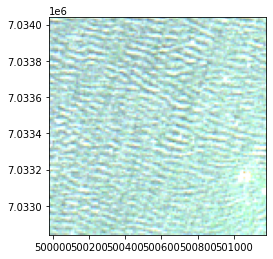

In [30]:
#https://towardsdatascience.com/reading-and-visualizing-geotiff-images-with-python-8dcca7a74510
import rasterio
from rasterio.plot import show
fp = r'/content/drive/MyDrive/Big/rgb.tif'
img = rasterio.open(fp)
show(img)

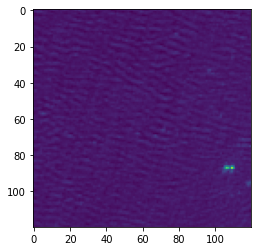

In [35]:
#read only band 1
show(img.read(1))

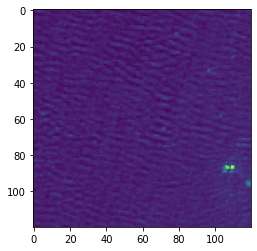

In [36]:
show(img.read(2))

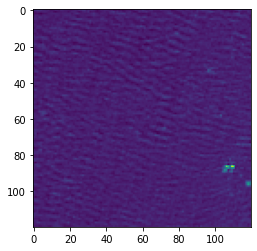

In [37]:
show(img.read(3))